In [1]:
import pandas as pd
pd.set_option('display.max_column',None)
pd.set_option('display.max_rows',None)
import numpy as np

In [2]:
ppt = pd.read_csv(r'Property_Price_Train.csv')

In [3]:
ppt.head()

,Id,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Lane_Type,Property_Shape,Land_Outline,Utility_Type,Lot_Configuration,Property_Slope,Neighborhood,Condition1,Condition2,House_Type,House_Design,Overall_Material,House_Condition,Construction_Year,Remodel_Year,Roof_Design,Roof_Quality,Exterior1st,Exterior2nd,Brick_Veneer_Type,Brick_Veneer_Area,Exterior_Material,Exterior_Condition,Foundation_Type,Basement_Height,Basement_Condition,Exposure_Level,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Total_Basement_Area,Heating_Type,Heating_Quality,Air_Conditioning,Electrical_System,First_Floor_Area,Second_Floor_Area,LowQualFinSF,Grade_Living_Area,Underground_Full_Bathroom,Underground_Half_Bathroom,Full_Bathroom_Above_Grade,Half_Bathroom_Above_Grade,Bedroom_Above_Grade,Kitchen_Above_Grade,Kitchen_Quality,Rooms_Above_Grade,Functional_Rate,Fireplaces,Fireplace_Quality,Garage,Garage_Built_Year,Garage_Finish_Year,Garage_Size,Garage_Area,Garage_Quality,Garage_Condition,Pavedd_Drive,W_Deck_Area,Open_Lobby_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Pool_Quality,Fence_Quality,Miscellaneous_Feature,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price
0,1,60,RLD,65.0,8450,Paved,NaN,Reg,Lvl,AllPub,I,GS,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,SS,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PC,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,TF,0,NaN,Attchd,2003.0,RFn,2,1085.793744,TA,TA,Y,163.788080,69.596115,20.337934,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RLD,80.0,9600,Paved,NaN,Reg,Lvl,AllPub,FR2P,GS,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,SS,MetalSd,MetalSd,NaN,0.0,TA,TA,CB,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,TF,1,TA,Attchd,1976.0,RFn,2,196.316304,TA,TA,Y,198.900074,74.716033,15.039392,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RLD,68.0,11250,Paved,NaN,IR1,Lvl,AllPub,I,GS,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,SS,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PC,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,TF,1,TA,Attchd,2001.0,RFn,2,218.068403,TA,TA,Y,26.127533,32.085268,-46.232198,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RLD,60.0,9550,Paved,NaN,IR1,Lvl,AllPub,C,GS,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,SS,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BT,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,TF,1,Gd,Detchd,1998.0,Unf,3,696.996439,TA,TA,Y,46.948018,40.181415,60.921821,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RLD,84.0,14260,Paved,NaN,IR1,Lvl,AllPub,FR2P,GS,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,SS,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PC,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,TF,1,TA,Attchd,2000.0,RFn,3,568.859882,TA,TA,Y,-10.626105,20.755323,21.788818,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
ppt.shape

(1459, 81)

# Data Cleaning

In [5]:
ppt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Id                         1459 non-null   int64  
 1   Building_Class             1459 non-null   int64  
 2   Zoning_Class               1459 non-null   object 
 3   Lot_Extent                 1200 non-null   float64
 4   Lot_Size                   1459 non-null   int64  
 5   Road_Type                  1459 non-null   object 
 6   Lane_Type                  91 non-null     object 
 7   Property_Shape             1459 non-null   object 
 8   Land_Outline               1459 non-null   object 
 9   Utility_Type               1459 non-null   object 
 10  Lot_Configuration          1459 non-null   object 
 11  Property_Slope             1459 non-null   object 
 12  Neighborhood               1459 non-null   object 
 13  Condition1                 1459 non-null   objec

In [6]:
ppt.isnull().sum()

Id                              0
Building_Class                  0
Zoning_Class                    0
Lot_Extent                    259
Lot_Size                        0
Road_Type                       0
Lane_Type                    1368
Property_Shape                  0
Land_Outline                    0
Utility_Type                    0
Lot_Configuration               0
Property_Slope                  0
Neighborhood                    0
Condition1                      0
Condition2                      0
House_Type                      0
House_Design                    0
Overall_Material                0
House_Condition                 0
Construction_Year               0
Remodel_Year                    0
Roof_Design                     0
Roof_Quality                    0
Exterior1st                     0
Exterior2nd                     0
Brick_Veneer_Type             871
Brick_Veneer_Area               8
Exterior_Material               0
Exterior_Condition              0
Foundation_Typ

In [8]:
ppt.Lot_Extent = ppt.Lot_Extent.fillna(ppt.Lot_Extent.mean())
ppt.Brick_Veneer_Type = ppt.Brick_Veneer_Type.fillna('None')
ppt.Brick_Veneer_Area = ppt.Brick_Veneer_Area.fillna(ppt.Brick_Veneer_Area.mean())
ppt.Basement_Height = ppt.Basement_Height.fillna('TA')
ppt.Basement_Condition = ppt.Basement_Condition.fillna('TA')
ppt.Exposure_Level = ppt.Exposure_Level.fillna('No')
ppt.BsmtFinType1  = ppt.BsmtFinType1.fillna('Unf')
ppt.BsmtFinType2 = ppt.BsmtFinType2.fillna('Unf')
ppt.Electrical_System = ppt.Electrical_System.fillna('Sbrkr')
ppt.Garage = ppt.Garage.fillna('Attchd')
ppt.Garage_Built_Year = ppt.Garage_Built_Year.fillna(ppt.Garage_Built_Year.mean())
ppt.Garage_Finish_Year = ppt.Garage_Finish_Year.fillna('Unf')
ppt.Garage_Quality = ppt.Garage_Quality.fillna('TA')
ppt.Garage_Condition = ppt.Garage_Condition.fillna('TA')


In [9]:
ppt.isnull().sum()[ppt.isnull().sum() > 0]

Lane_Type                1368
Fireplace_Quality         689
Pool_Quality             1452
Fence_Quality            1178
Miscellaneous_Feature    1405
dtype: int64

In [10]:
# find the how many columns  

len(ppt.isnull().sum()[ppt.isnull().sum() > 0])

5

In [ ]:
# drop the null values by using dropna() function

#ppt.dropna(how='any',inplace=True)

In [11]:
# null values than 50% 

ppt.isnull().sum()[ppt.isnull().sum() * 100 / ppt.shape[0] > 50 ]

Lane_Type                1368
Pool_Quality             1452
Fence_Quality            1178
Miscellaneous_Feature    1405
dtype: int64

In [12]:
ppt.Lot_Extent.value_counts()

Lot_Extent
70.045833     259
60.000000     143
70.000000      70
80.000000      69
50.000000      57
75.000000      52
65.000000      44
85.000000      40
78.000000      25
90.000000      23
21.000000      23
64.000000      19
24.000000      19
68.000000      19
73.000000      18
55.000000      17
72.000000      17
63.000000      17
79.000000      17
100.000000     16
66.000000      15
51.000000      15
74.000000      15
52.000000      14
59.000000      13
82.000000      12
71.000000      12
67.000000      12
57.000000      12
43.000000      12
40.000000      12
76.000000      11
69.000000      11
88.000000      10
34.000000      10
53.000000      10
86.000000      10
92.000000      10
35.000000       9
84.000000       9
44.000000       9
77.000000       9
62.000000       9
61.000000       8
93.000000       8
96.000000       8
98.000000       8
120.000000      7
107.000000      7
58.000000       7
95.000000       7
30.000000       6
41.000000       6
110.000000      6
54.000000       6

In [13]:
ppt.Lot_Extent  = ppt.Lot_Extent.fillna(ppt.Lot_Extent.mean())

In [14]:
ppt.Brick_Veneer_Type.value_counts()

Brick_Veneer_Type
None       871
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64

In [15]:
ppt.Brick_Veneer_Type = ppt.Brick_Veneer_Type.fillna('None')

In [16]:
ppt = ppt.drop(['Lane_Type','Pool_Quality','Fence_Quality','Miscellaneous_Feature'],axis = 1)

In [17]:
ppt.shape

(1459, 77)

# Label Encoder 

- All the column object convert into numeric

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
le = LabelEncoder()

In [20]:
# fit function use for start the train the data

ppt[ppt.select_dtypes(include = ['object']).columns] = ppt[ppt.select_dtypes(include = ['object']).columns].apply(le.fit_transform)

In [21]:
ppt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 77 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Id                         1459 non-null   int64  
 1   Building_Class             1459 non-null   int64  
 2   Zoning_Class               1459 non-null   int32  
 3   Lot_Extent                 1459 non-null   float64
 4   Lot_Size                   1459 non-null   int64  
 5   Road_Type                  1459 non-null   int32  
 6   Property_Shape             1459 non-null   int32  
 7   Land_Outline               1459 non-null   int32  
 8   Utility_Type               1459 non-null   int32  
 9   Lot_Configuration          1459 non-null   int32  
 10  Property_Slope             1459 non-null   int32  
 11  Neighborhood               1459 non-null   int32  
 12  Condition1                 1459 non-null   int32  
 13  Condition2                 1459 non-null   int32

- First all the data in the numeric format(it is must)
- if your data in object then it shows the error

In [22]:
ppt.head()

,Id,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Property_Shape,Land_Outline,Utility_Type,Lot_Configuration,Property_Slope,Neighborhood,Condition1,Condition2,House_Type,House_Design,Overall_Material,House_Condition,Construction_Year,Remodel_Year,Roof_Design,Roof_Quality,Exterior1st,Exterior2nd,Brick_Veneer_Type,Brick_Veneer_Area,Exterior_Material,Exterior_Condition,Foundation_Type,Basement_Height,Basement_Condition,Exposure_Level,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Total_Basement_Area,Heating_Type,Heating_Quality,Air_Conditioning,Electrical_System,First_Floor_Area,Second_Floor_Area,LowQualFinSF,Grade_Living_Area,Underground_Full_Bathroom,Underground_Half_Bathroom,Full_Bathroom_Above_Grade,Half_Bathroom_Above_Grade,Bedroom_Above_Grade,Kitchen_Above_Grade,Kitchen_Quality,Rooms_Above_Grade,Functional_Rate,Fireplaces,Fireplace_Quality,Garage,Garage_Built_Year,Garage_Finish_Year,Garage_Size,Garage_Area,Garage_Quality,Garage_Condition,Pavedd_Drive,W_Deck_Area,Open_Lobby_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price
0,1,60,3,65.0,8450,1,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,4,12,13,1,196.0,2,4,2,2,3,3,2,706,5,0,150,856,1,0,1,4,856,854,0,1710,1,0,2,1,3,1,2,8,7,0,5,2,2003.0,1,2,1085.793744,4,4,2,163.788080,69.596115,20.337934,0,0,0,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,4,8,8,2,0.0,3,4,1,2,3,1,0,978,5,0,284,1262,1,0,1,4,1262,0,0,1262,0,1,2,0,3,1,3,6,7,1,4,2,1976.0,1,2,196.316304,4,4,2,198.900074,74.716033,15.039392,0,0,0,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,4,12,13,1,162.0,2,4,2,2,3,2,2,486,5,0,434,920,1,0,1,4,920,866,0,1786,1,0,2,1,3,1,2,6,7,1,4,2,2001.0,1,2,218.068403,4,4,2,26.127533,32.085268,-46.232198,0,0,0,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,4,13,15,2,0.0,3,4,0,3,1,3,0,216,5,0,540,756,1,2,1,4,961,756,0,1717,1,0,1,0,3,1,2,7,7,1,2,6,1998.0,2,3,696.996439,4,4,2,46.948018,40.181415,60.921821,0,0,0,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,4,12,13,1,350.0,2,4,2,2,3,0,2,655,5,0,490,1145,1,0,1,4,1145,1053,0,2198,1,0,2,1,4,1,2,9,7,1,4,2,2000.0,1,3,568.859882,4,4,2,-10.626105,20.755323,21.788818,0,0,0,0,12,2008,8,4,250000


In [23]:
ppt.select_dtypes(include='object').columns

Index([], dtype='object')

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
ppt_train, ppt_test = train_test_split(ppt,test_size = .2)

In [26]:
ppt_train_x = ppt_train.iloc[:, 0:-1]
ppt_train_y = ppt_train.iloc[:, -1]

In [27]:
ppt_test_x = ppt_test.iloc[:, 0:-1]
ppt_test_y = ppt_test.iloc[:, -1]

In [28]:
ppt.head()

,Id,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Property_Shape,Land_Outline,Utility_Type,Lot_Configuration,Property_Slope,Neighborhood,Condition1,Condition2,House_Type,House_Design,Overall_Material,House_Condition,Construction_Year,Remodel_Year,Roof_Design,Roof_Quality,Exterior1st,Exterior2nd,Brick_Veneer_Type,Brick_Veneer_Area,Exterior_Material,Exterior_Condition,Foundation_Type,Basement_Height,Basement_Condition,Exposure_Level,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Total_Basement_Area,Heating_Type,Heating_Quality,Air_Conditioning,Electrical_System,First_Floor_Area,Second_Floor_Area,LowQualFinSF,Grade_Living_Area,Underground_Full_Bathroom,Underground_Half_Bathroom,Full_Bathroom_Above_Grade,Half_Bathroom_Above_Grade,Bedroom_Above_Grade,Kitchen_Above_Grade,Kitchen_Quality,Rooms_Above_Grade,Functional_Rate,Fireplaces,Fireplace_Quality,Garage,Garage_Built_Year,Garage_Finish_Year,Garage_Size,Garage_Area,Garage_Quality,Garage_Condition,Pavedd_Drive,W_Deck_Area,Open_Lobby_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price
0,1,60,3,65.0,8450,1,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,4,12,13,1,196.0,2,4,2,2,3,3,2,706,5,0,150,856,1,0,1,4,856,854,0,1710,1,0,2,1,3,1,2,8,7,0,5,2,2003.0,1,2,1085.793744,4,4,2,163.788080,69.596115,20.337934,0,0,0,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,4,8,8,2,0.0,3,4,1,2,3,1,0,978,5,0,284,1262,1,0,1,4,1262,0,0,1262,0,1,2,0,3,1,3,6,7,1,4,2,1976.0,1,2,196.316304,4,4,2,198.900074,74.716033,15.039392,0,0,0,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,4,12,13,1,162.0,2,4,2,2,3,2,2,486,5,0,434,920,1,0,1,4,920,866,0,1786,1,0,2,1,3,1,2,6,7,1,4,2,2001.0,1,2,218.068403,4,4,2,26.127533,32.085268,-46.232198,0,0,0,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,4,13,15,2,0.0,3,4,0,3,1,3,0,216,5,0,540,756,1,2,1,4,961,756,0,1717,1,0,1,0,3,1,2,7,7,1,2,6,1998.0,2,3,696.996439,4,4,2,46.948018,40.181415,60.921821,0,0,0,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,4,12,13,1,350.0,2,4,2,2,3,0,2,655,5,0,490,1145,1,0,1,4,1145,1053,0,2198,1,0,2,1,4,1,2,9,7,1,4,2,2000.0,1,3,568.859882,4,4,2,-10.626105,20.755323,21.788818,0,0,0,0,12,2008,8,4,250000


# Linear Regression

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
linereg = LinearRegression()

In [31]:
linereg

LinearRegression()

In [32]:
linereg.fit(ppt_train_x,ppt_train_y) # fit = start the traning of a model

LinearRegression()

# Rsquare

In [33]:
Rsquare = linereg.score(ppt_train_x,ppt_train_y)
Rsquare

0.8517981595086395

In [34]:
N = ppt_train_x.shape[0]
K = ppt_train_x.shape[1]

# Adj Rsquare

In [35]:
Adj_Rsquare = 1-(1-Rsquare) * (N-1)/(N-K-1)
Adj_Rsquare

0.8414648201716272

In [36]:
ppt_train_x.columns

Index(['Id', 'Building_Class', 'Zoning_Class', 'Lot_Extent', 'Lot_Size',
       'Road_Type', 'Property_Shape', 'Land_Outline', 'Utility_Type',
       'Lot_Configuration', 'Property_Slope', 'Neighborhood', 'Condition1',
       'Condition2', 'House_Type', 'House_Design', 'Overall_Material',
       'House_Condition', 'Construction_Year', 'Remodel_Year', 'Roof_Design',
       'Roof_Quality', 'Exterior1st', 'Exterior2nd', 'Brick_Veneer_Type',
       'Brick_Veneer_Area', 'Exterior_Material', 'Exterior_Condition',
       'Foundation_Type', 'Basement_Height', 'Basement_Condition',
       'Exposure_Level', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'Total_Basement_Area', 'Heating_Type',
       'Heating_Quality', 'Air_Conditioning', 'Electrical_System',
       'First_Floor_Area', 'Second_Floor_Area', 'LowQualFinSF',
       'Grade_Living_Area', 'Underground_Full_Bathroom',
       'Underground_Half_Bathroom', 'Full_Bathroom_Above_Grade',
       'Half_Bathroom_A

In [37]:
linereg.coef_

array([-1.30317396e+00, -1.16684815e+02, -1.75552647e+03, -1.49115639e+02,
        1.93069728e-01,  1.78397267e+04, -9.28026976e+02,  3.77313060e+03,
       -4.34051094e+04, -2.38505694e+02,  6.44771062e+03,  3.68763485e+02,
       -9.01058787e+02, -9.74750740e+03, -2.77389015e+03, -1.76139952e+03,
        1.15150588e+04,  4.78609023e+03,  1.35855383e+02,  2.88670881e+01,
        1.50296160e+03,  3.31408106e+04, -9.03405370e+02,  2.58623695e+02,
        4.39228347e+03,  3.55164256e+01, -6.83028094e+03,  6.67463151e+02,
        2.53942630e+03, -8.78617255e+03,  2.17986967e+03, -4.20145909e+03,
       -7.91241016e+02,  8.32592961e+00,  1.78853949e+00,  2.01618567e+00,
       -2.51818513e+00,  7.82393013e+00, -2.28039329e+03, -8.80964294e+02,
        4.75073385e+02, -4.98780857e+02,  1.84355031e+01,  2.05515671e+01,
       -1.68852627e+01,  2.21018074e+01,  5.91316417e+03, -2.07999545e+03,
        6.08730700e+03,  1.34186558e+01, -3.31116422e+03, -1.12384565e+04,
       -8.72755984e+03,  

In [38]:
linereg.intercept_

1264010.178677294

#  Prediction

In [40]:
pred_train = linereg.predict(ppt_train_x)
pred_test = linereg.predict(ppt_test_x)

# Find the error

In [41]:
err_test = ppt_test_y - pred_test
err_test

1131     -2935.065108
1231        50.336439
217      21961.940387
845     -12948.274136
1126    -27286.224168
1063    -36509.544762
409      23138.554457
283       6049.639212
1073     18615.715157
867      -6934.974982
1239     12442.450871
1160      1486.073764
1022    -22413.106405
161      26946.148665
1357       110.390125
102      11838.400718
1173    -10283.470920
127      11045.902839
218      78390.886536
1278    -12812.864211
60      -22653.272957
1166     -4889.070225
1115      1633.713624
1065     62998.800268
668      15573.423106
907      27795.462975
542     -20831.594765
598       6580.092385
313      72431.874782
2         5092.156702
578     -12739.031962
1075     62892.668386
451     -51650.110041
719      -9453.138770
865      18247.854325
1193    -13985.409393
1025      2339.500467
1265     -9149.744686
965      -5642.073400
994     -24958.628685
1109    -11916.478773
1206     -1782.982816
1346     27787.812070
1078      5765.150098
593      -6760.786477
325     -2

# MSE

In [42]:
mse = np.mean(np.square(err_test))
mse

850458878.240368

# RMSE

In [43]:
rmse = np.sqrt(mse)
rmse

29162.62810928343

# MAPE

In [44]:
mape = np.mean(np.abs(err_test * 100/ppt_test_y))
mape

11.579076352041989

In [ ]:
# check the assumptions
# assumptions On the train data

In [45]:
err_train = ppt_train_y - pred_train
err_train

426     4.094298e+04
209    -3.258003e+04
489    -6.091027e+03
170     6.519946e+03
1417    3.564737e+04
1262    2.834633e+04
53     -2.321959e+04
1150    5.729281e+02
1210   -8.797856e+03
648    -1.702018e+03
154     2.042154e+04
1046    1.614992e+05
193    -4.860661e+04
631    -7.279323e+03
204    -1.732317e+04
699     6.820880e+03
1153   -1.508682e+04
920     1.201616e+03
1285    2.432150e+02
1436    8.890643e+03
588    -1.207961e+05
207     2.462332e+04
398    -1.073438e+04
1200    4.132853e+04
317     1.227054e+04
5      -2.576690e+04
1396   -1.153692e+04
88      8.249443e+03
1145    1.197277e+04
1024   -1.043739e+05
84      1.830457e+03
575     1.373203e+04
625     1.609303e+04
664     7.676634e+04
1064    3.428703e+03
436    -3.875768e+04
201    -7.303480e+02
1039    1.666686e+04
1400    7.130634e+02
654     2.874029e+04
1250   -2.583721e+04
177    -2.995630e+04
135    -2.166651e+04
41      2.594696e+04
841    -1.054277e+03
383    -2.166025e+04
849    -2.486959e+03
292    -6.930

In [46]:
np.mean(err_train)

-1.4165360496507921e-11

In [47]:
# Errors should be normally distributed

In [48]:
import matplotlib.pyplot as plt

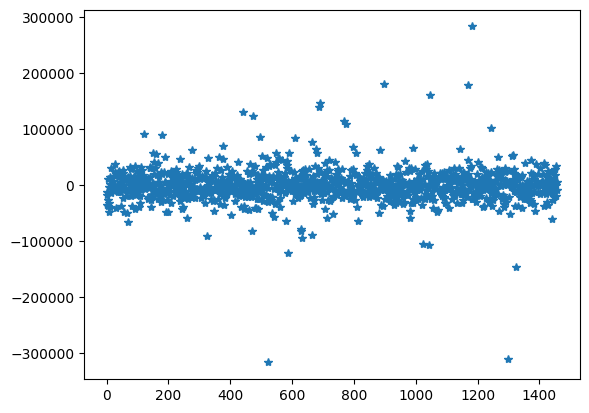

In [50]:
plt.plot(err_train,'*') # * - marker

(array([  2.,   0.,   0.,   0.,   0.,   1.,   2.,   7.,  19., 208., 648.,
        236.,  28.,   6.,   4.,   3.,   2.,   0.,   0.,   1.]),
 array([-317164.11041453, -287114.05227805, -257063.99414157,
        -227013.93600509, -196963.87786861, -166913.81973213,
        -136863.76159565, -106813.70345917,  -76763.64532269,
         -46713.58718621,  -16663.52904973,   13386.52908675,
          43436.58722323,   73486.64535971,  103536.70349619,
         133586.76163267,  163636.81976915,  193686.87790563,
         223736.93604211,  253786.99417859,  283837.05231507]),
 <BarContainer object of 20 artists>)

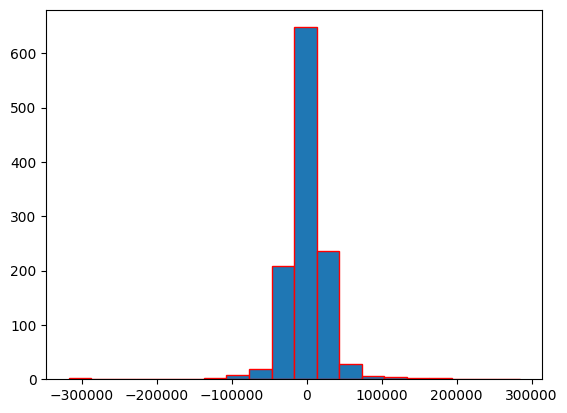

In [51]:
plt.hist(err_train , bins=20, edgecolor = 'r')

In [52]:
pred_actual_df = pd.DataFrame()

In [53]:
pred_actual_df['Actual'] = ppt_train_y
pred_actual_df['Predicted'] = pred_train

In [54]:
pred_actual_df

,Actual,Predicted
426,275000,234057.017142
209,145000,177580.025077
489,86000,92091.026688
170,128500,121980.053820
1417,340000,304352.628743
1262,161500,133153.673916
53,385000,408219.591743
1150,124000,123427.071856
1210,189000,197797.855800
648,155000,156702.018483


In [55]:
import seaborn as sns

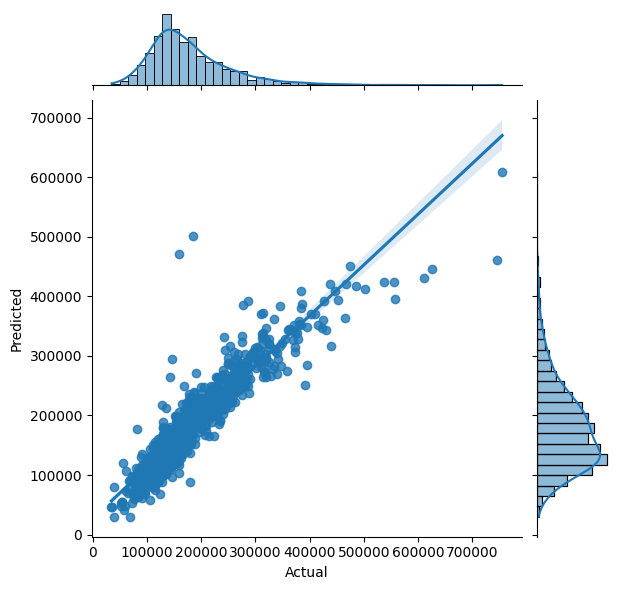

In [56]:
sns.jointplot(x='Actual',y = 'Predicted',data= pred_actual_df, kind ='reg')